Sampling single mode initial states using methods presented in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033); errata [Olsen, Lewis-Swan, Bradley, Opt. Comm. 370 (2016) 327-328](https://doi.org/10.1016/j.optcom.2016.02.068)

We also sample some new distributions:
- fock state for +W
- thermal state for +P

In [1]:
using PhaseSpaceTools, PyPlot, QuadGK

In [3]:
?coherent

search: coherent cohere



```julia
a,ā = coherent(β,N;dist)
```

samples phase space distribution for coherent state

`β` is coherent amplitude (complex)

`N` is number of samples

`dist` is distrubtion. Can be either `+P` or `W`

For a coherent state in +P the distribution is just a point on the complex plane at the position of the coherent amplitude. Default (no value for dist) will give +P


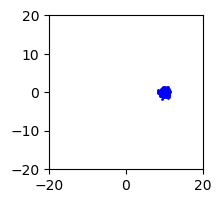

99.68128004294816 + 0.0im


In [2]:
b=10
N=1000
a,ā = coherent(b,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)

In [6]:
?thermal

search: thermal



```julia
a,ā = thermal(β,n̄,N;dist)
```

samples phase space distribution for a thermal state:

`β` is complex displacement

`n̄` is thermal average population

`N` is number of samples

`dist` is the distribution. Can be `P`, `Q` or `W`


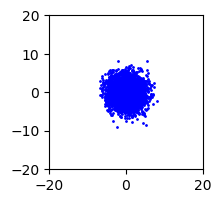

10.01259411134022 + 0.0im

In [3]:
a,ā = thermal(0,10,5000;dist="P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)

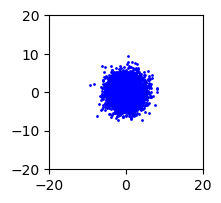

9.910522506467501 + 0.0im

In [4]:
a,ā = thermal(0,10,5000;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)-.5

In [9]:
?squeezed

search: squeezed squeeze



```julia
a,ā = squeezed(β,ϵ,N;dist)
```

samples phase space distribution for a squeezed state

`β` is coherent amplitude

`ϵ` is (complex) squeezing parameter

`N` is number of samples

`dist` is the distribution; can be `W` or `+P`


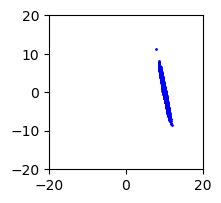

104.4230337701123 + 0.0im
104.53383099788888


In [6]:
β = 10
ϕ = π/16
r = 1.5
ϵ = r*exp(2*im*ϕ)
N = 10000
a,ā = squeezed(β,ϵ,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(sinh(abs(ϵ)).^2+abs2(β))

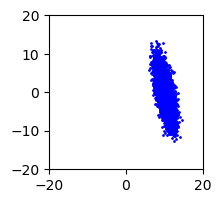

113.09078247103137
113.15411641800824


In [8]:
β = 10
ϕ = π/16
r = 2
ϵ = r*exp(2*im*ϕ)
N = 10000
a,ā = squeezed(β,ϵ,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(real(mean(a.*ā)))
println(sinh(abs(ϵ)).^2+abs2(β))

In [12]:
?fock

search: fock foreach UniformScaling functionloc @functionloc



```julia
a,ā = fock(n,N;dist)
```

samples phase space distribution for a Fock state `n` is number of fock state

`N` is number of samples

`dist` is distribution. Can be either `W`, `+W`, or `+P`(default)


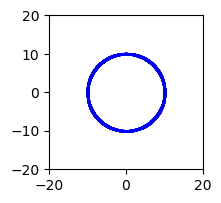

100.0007841361567 + 0.0im
100


In [9]:
n = 100
N = 10000
a,ā = fock(n,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(n)

160.082231120927 + 0.22388088358055303im


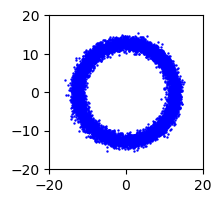

160


In [2]:
n = 160
N = 10000
a,ā = fock(n,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(n)

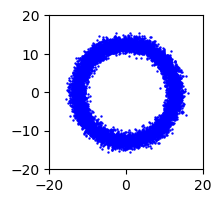

n = 160
<a⁺a> = 160.0874434562929 + 0.09566679768181005im


In [6]:
n = 160
N = 10000
a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println("n = ",n)
println("<a⁺a> = ", mean(ā.*a)-.5)

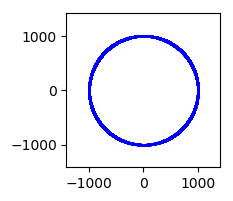

n = 1000000
<a⁺a> = 1.0000032043563351e6 + 2.1784587191855995im


In [5]:
#push n and N
#for large n>320 uses asymptotic expansion
n=1000000
N=50000
a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)]);
println("n = ", n)
println("<a⁺a> = ", mean(ā.*a)-.5)

In [25]:
?crescent

search: crescent



```julia
a,ā = crescent(β,ϵ,q,N;dist)
```

Sample phase space distribution for a crescent state

`β` is coherent amplitude

`ϵ` is squeeze paramter

`q` is shearing parameter

`N` is number of samples

`dist` is distribution. Can be either `Q` or `+P`


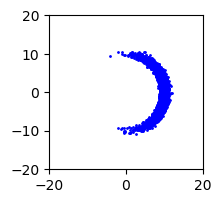

99.92816197964743 + 0.0im
100.0


In [26]:
β = 10
ϵ = 0
q = .5
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
#not quite the right moments for crescent state, but a sanity check of sorts:
println(sinh(abs(ϵ)).^2+abs2(β)) 

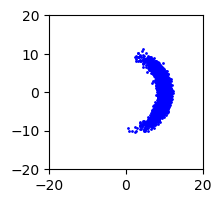

99.98526198696538 + 0.0im
100.0


In [27]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="Q")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-1)
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

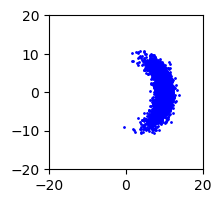

100.18333054090145 + 0.2120342238795661im
100.0


In [28]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

# Implement fock states for +W
- currently $|n\rangle$ limited to states with $n<=300$.
- asymptotic expansionc for large $n$.

### Distribution to sample
Distribution 
$$P_n(x)=\frac{4}{3}e^{-2x^2/3}L_n(-4x^2/3)\frac{x}{3^n}$$ 

### Asymptotic expansion
$$L_n(-x)=\frac{e^{-x/2+2\sqrt{x(n+1)}}}{2\sqrt{\pi}(x(n+1))^{1/4}}$$

and hence
$$P_n(x)\sim\frac{2x}{3^{n+1}}\frac{e^{-4x^2/3+2\sqrt{4x^2/3(n+1)}}}{\sqrt{\pi}(x(n+1))^{1/4}}$$

### Asymptotic
Expansion
$$n!L_n(-x)=e^{-x}\int_0^\infty dt\; e^{-t}t^nI_0(2\sqrt{tx})$$
Hence
$$e^{-2x^2/3}L_n(-4x^2/3)=\frac{e^{-2x^2}}{n!}\int_0^\infty dt\; e^{-t}t^nI_0(2\sqrt{t4x^2/3})$$

Then use asymptotic ($n\gg 1$, $x\sim \sqrt{n}$)
$$I_0(x)\sim \frac{e^x}{\sqrt{2\pi x}}$$
and we have
$$I_0(2 \sqrt{t4x^2/3})\sim \frac{e^{2 \sqrt{t4x^2/3}}}{\sqrt{4\pi \sqrt{4tx^2/3}}}$$

to give
$$e^{-2x^2/3}L_n(-4x^2/3)\sim\frac{e^{-2x^2}}{n!\sqrt{4\pi x}}(3/4)^{1/4}\int_0^\infty dt\; e^{-t}t^{n-1/4}e^{2 \sqrt{t4x^2/3}}$$
or
$$e^{-2x^2/3}L_n(-4x^2/3)\sim\frac{e^{-2x^2/3}}{n!\sqrt{4\pi x}}(3/4)^{1/4}\int_0^\infty dt\; e^{-(\sqrt{t}-\sqrt{4x^2/3})^2}t^{n-1/4}$$

For large $n$ the integrand is localized around $x=\sqrt{n}$. We extend the integrand, and change vars to $s=\sqrt{t}$, $ds=dt/2\sqrt{t}$, or $dt=2sds$.
Then, neglecting the $1/2$ for large $n$
$$e^{-2x^2/3}L_n(-4x^2/3)\sim\frac{e^{-2x^2/3}}{n!\sqrt{\pi x}}(3/4)^{1/4}\int_{-\infty}^\infty ds\; e^{-(s-\sqrt{4x^2/3})^2}s^{2n+3/4}=\frac{e^{-2x^2/3}}{n!\sqrt{\pi x}}(3/4)^{1/4}\int_{-\infty}^\infty ds\; e^{-s^2}\left(s+\sqrt{4x^2/3}\right)^{2n+3/4}$$
Have
$$\int_{-\infty}^\infty ds\; e^{-s^2}s^{2n}=\Gamma(n+1/2),$$ and since $x\sim \sqrt{n}$, have 
$$\int_{-\infty}^\infty ds\; e^{-s^2}\sqrt{4x^2/3}^{2n}\sim \sqrt{\pi}n^n\left(\frac{4}{3}\right)^n$$
and this will beat the factorial term. 

Hence for large $n$, asymptotic form is
$$e^{-2x^2/3}L_n(-4x^2/3)\sim \frac{e^{-2x^2/3}x^{2n}}{n!}\left(\frac{4}{3}\right)^n$$
and the distribution becomes
$$P_n(x)\sim\frac{e^{-2x^2/3}x^{2n+1}}{n!}\left(\frac{2}{3}\right)^{2n}$$

In [ ]:
weighted_hist(x; kws...) = PyPlot.plt[:hist](x; weights=ones(length(x))/length(x), kws...)

In [ ]:
n̄ = mean(a.*ā)-.5

In [ ]:
Vn = mean(a.^2.*ā.^2) - n̄ - n̄^2 #+P

In [31]:
#other ways to call laguerre: high precision
using PyCall
@pyimport mpmath as mp
lagbig(x,n)=mp.laguerre(n,0,x)
lagbig(.1,3)
#@pyimport scipy as sp
#@pyimport scipy.special as sps
#laguerre(x,n)=sps.eval_laguerre(n,x)

7.148333333333333183175669252780911687852897321888603691600313603202268979182043e-01